In [43]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.graph_objects as go



In [44]:
df = pd.read_csv('Pop.csv')



In [45]:
df.head()

,Region,Year,Gender,Nationality,Population estimates
0,Madinah,"2,014",Female,Saudi,"562,344"
1,Tabouk,"2,010",Female,Saudi,"239,792"
2,Hail,"2,013",Female,Saudi,"211,727"
3,Eastern Region,"2,016",Male,Saudi,"1,308,467"
4,Al-Baha,"2,018",Female,Non-Saudi,"16,951"


In [46]:
df.describe()

,Region,Year,Gender,Nationality,Population estimates
count,676,676,676,676,676
unique,13,13,2,2,675
top,Madinah,"2,014",Female,Saudi,"16,230"
freq,52,52,338,338,2


In [60]:
# Convert Population estimates to integers
df['Population estimates'] = df['Population estimates'].str.replace(',', '').astype(int)

AttributeError: Can only use .str accessor with string values!

In [61]:
df.head()

,Region,Year,Gender,Nationality,Population estimates
0,Madinah,"2,014",Female,Saudi,562344
1,Tabouk,"2,010",Female,Saudi,239792
2,Hail,"2,013",Female,Saudi,211727
3,Eastern Region,"2,016",Male,Saudi,1308467
4,Al-Baha,"2,018",Female,Non-Saudi,16951


In [63]:
df['Year'] = df['Year'].str.replace(',', '')

In [64]:
df.head()

,Region,Year,Gender,Nationality,Population estimates
0,Madinah,2014,Female,Saudi,562344
1,Tabouk,2010,Female,Saudi,239792
2,Hail,2013,Female,Saudi,211727
3,Eastern Region,2016,Male,Saudi,1308467
4,Al-Baha,2018,Female,Non-Saudi,16951


In [50]:
df.isnull().sum()

Region                  0
Year                    0
Gender                  0
Nationality             0
Population estimates    0
dtype: int64

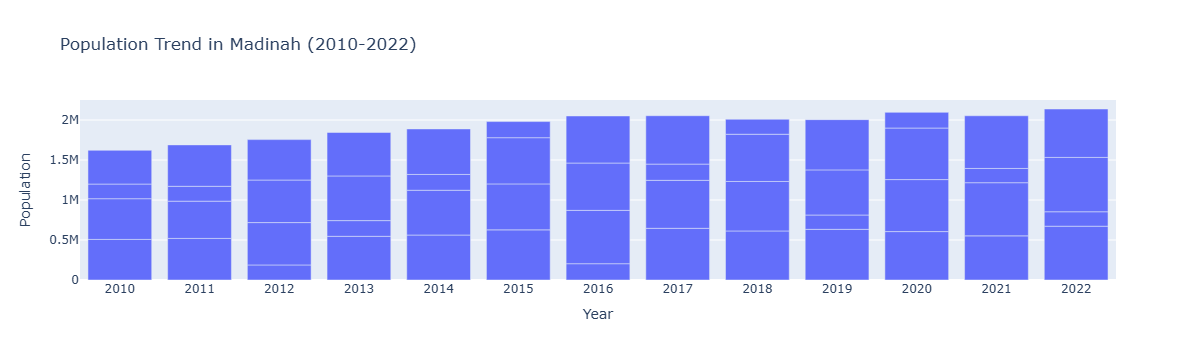

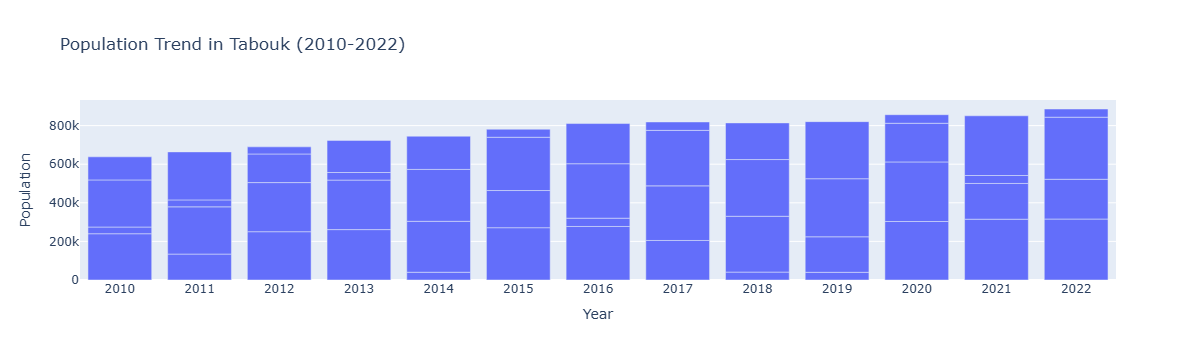

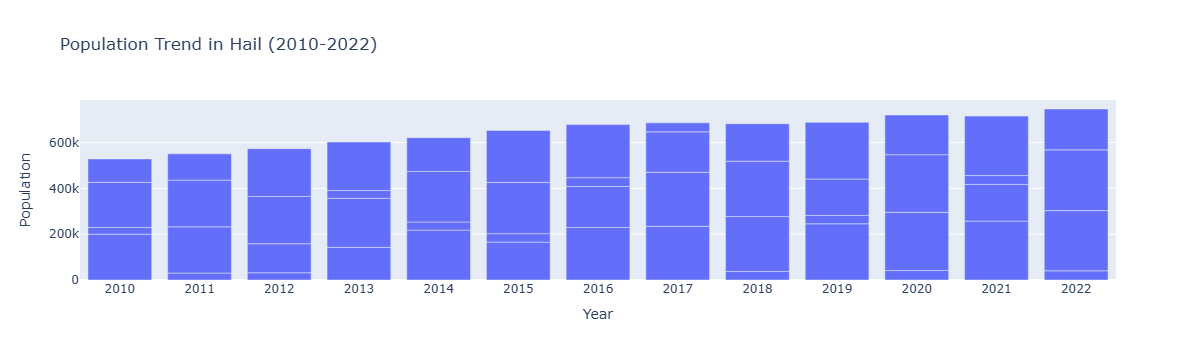

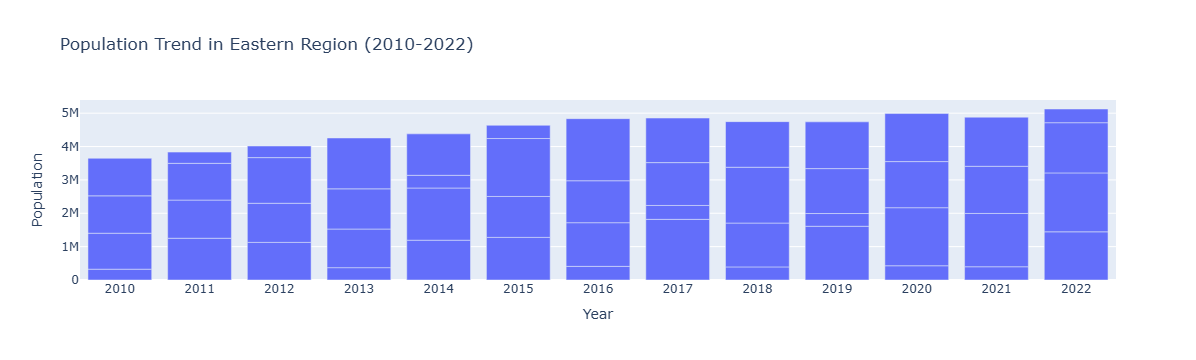

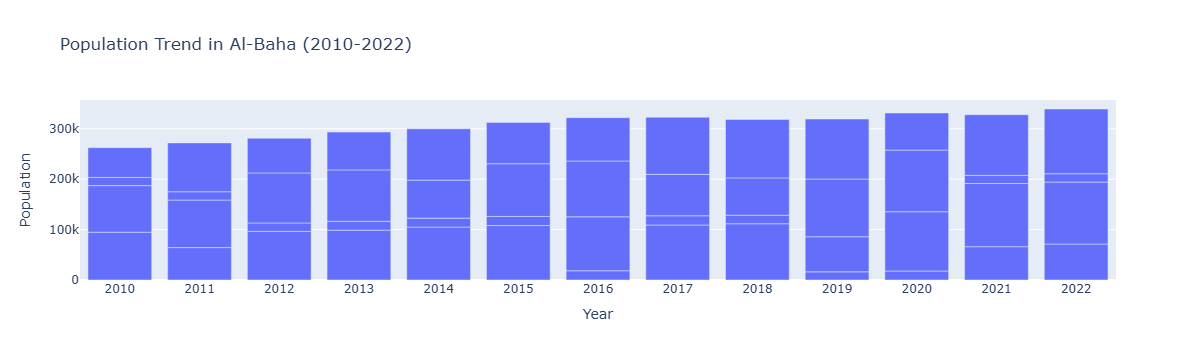

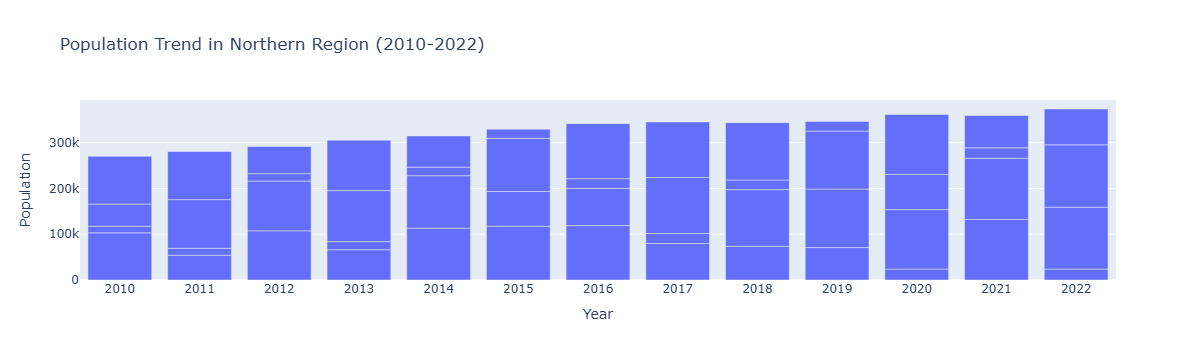

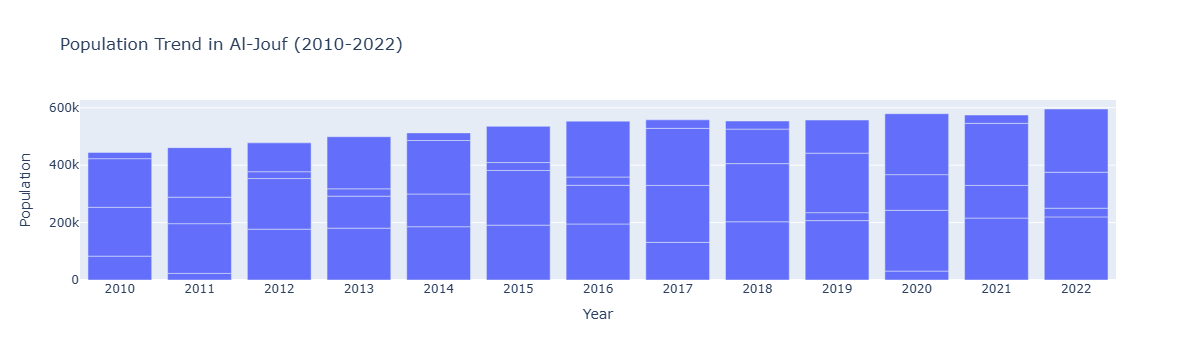

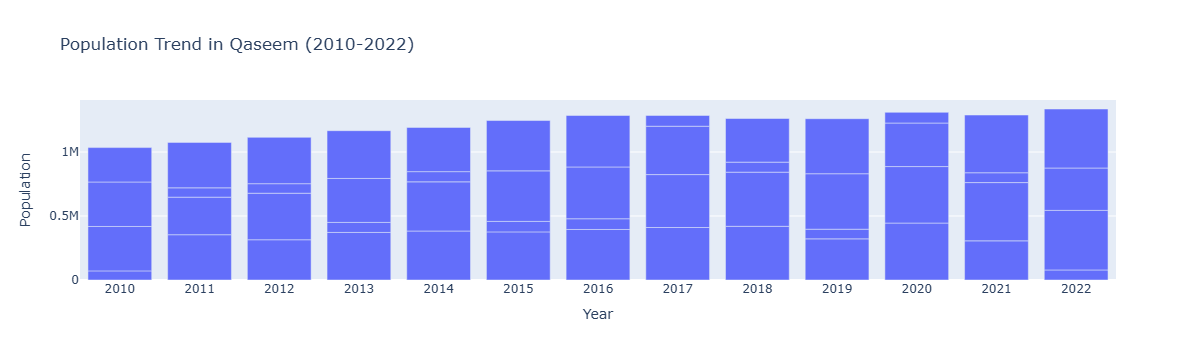

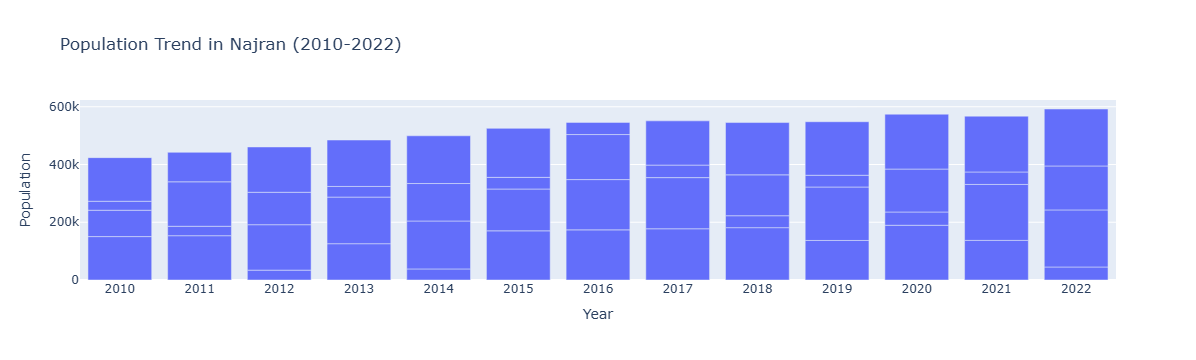

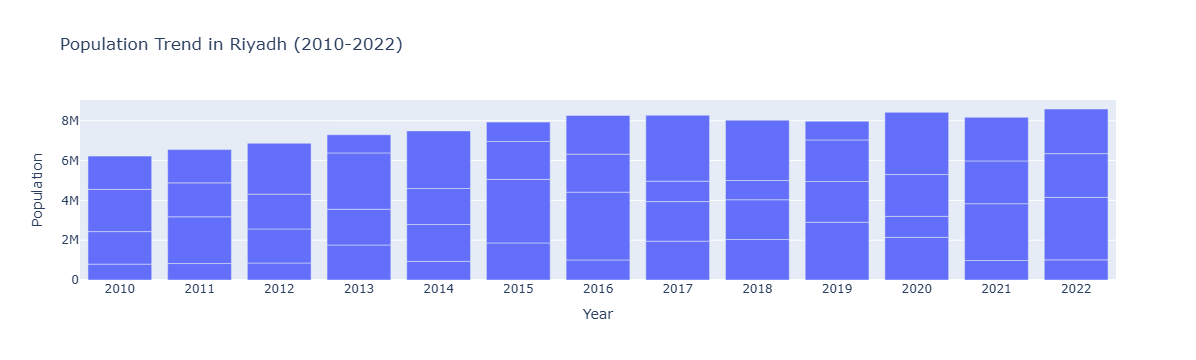

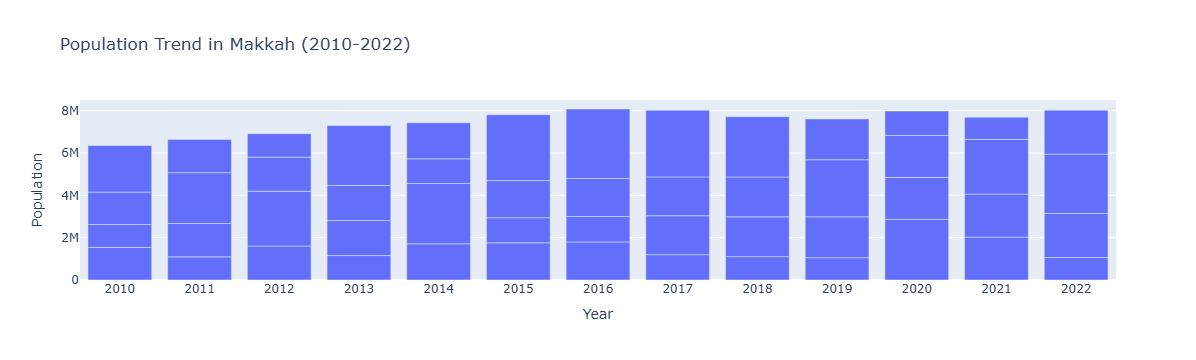

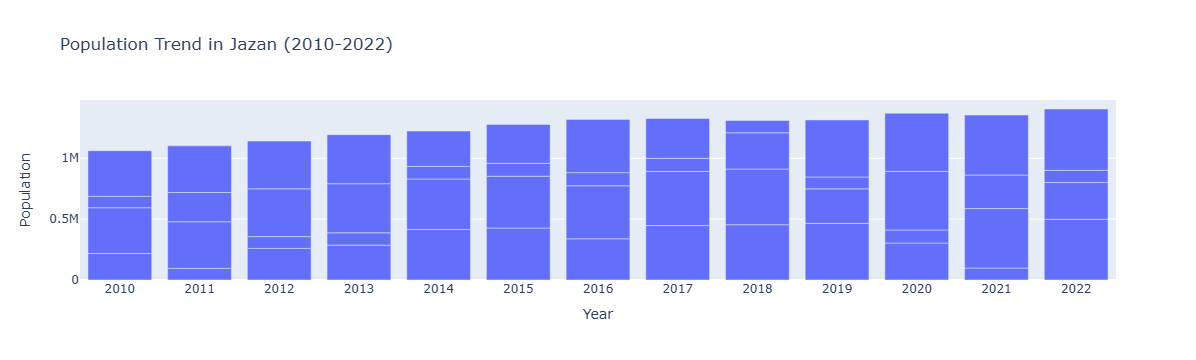

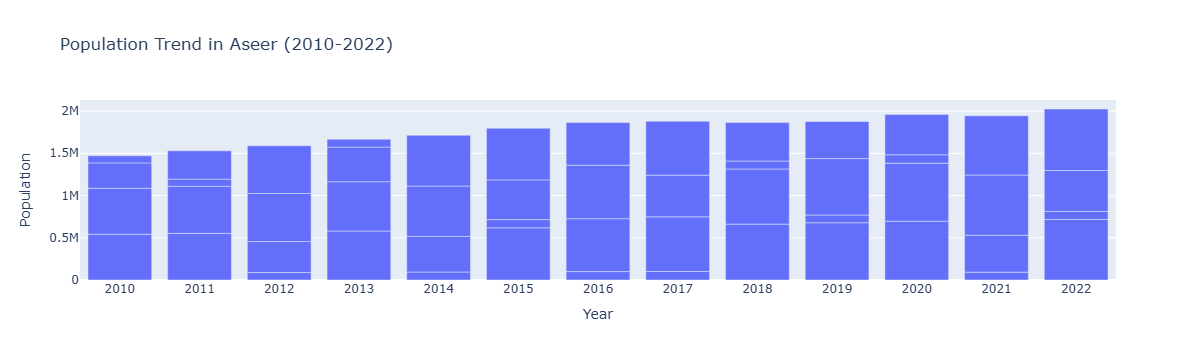

In [65]:
def visualize_population_by_region_bar(df):
    unique_regions = df['Region'].unique()

    for region in unique_regions:
        region_data = df[df['Region'] == region]
        
        #Sort the years from low to high for a better view
        region_data = region_data.sort_values(by='Year')


            # Create bar plot using Plotly
        fig = go.Figure()

        fig.add_trace(go.Bar(
            x=region_data['Year'],
            y=region_data['Population estimates'],
            name='Population'
       

        ))
        
        # Layout configurations
        fig.update_layout(
            title=f"Population Trend in {region} (2010-2022)",
            xaxis_title="Year",
            yaxis_title="Population"
        )
        
        fig.show()


visualize_population_by_region_bar(df)
       

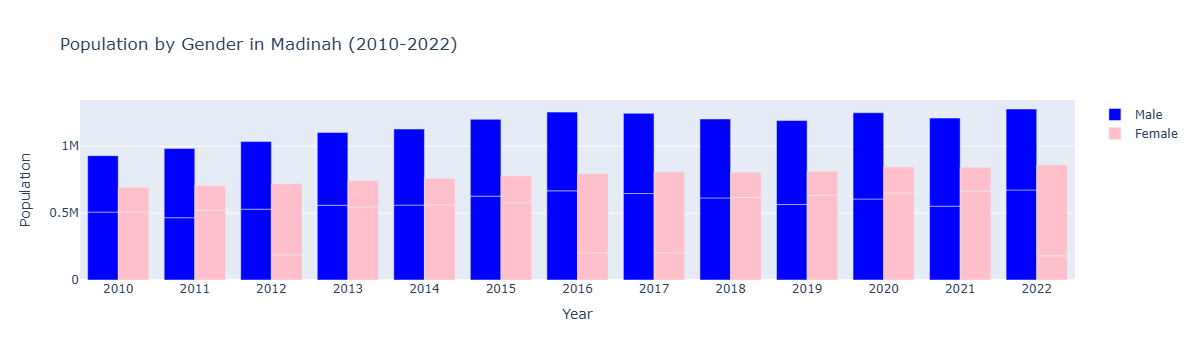

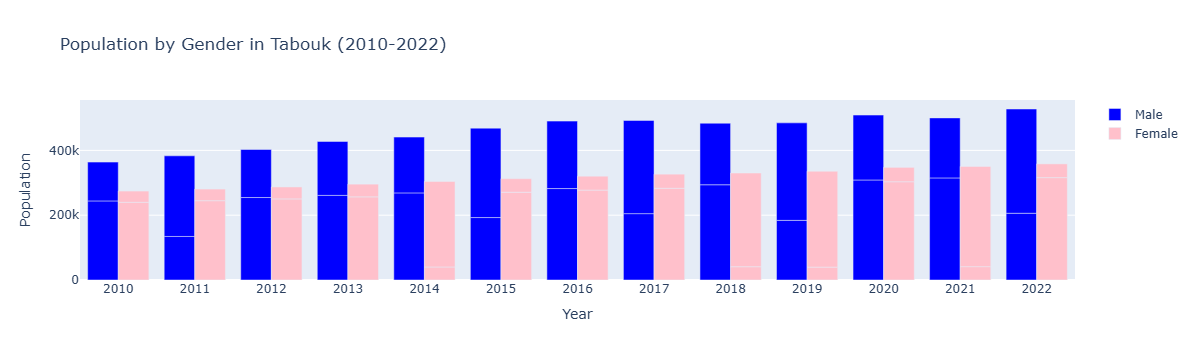

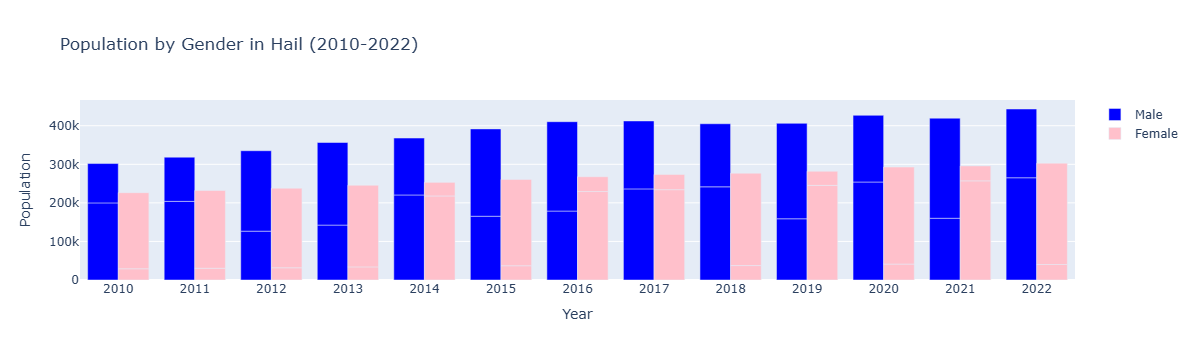

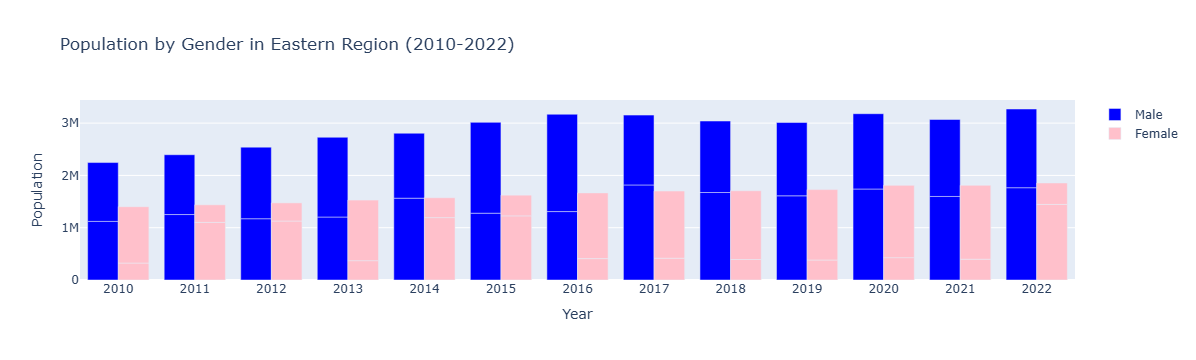

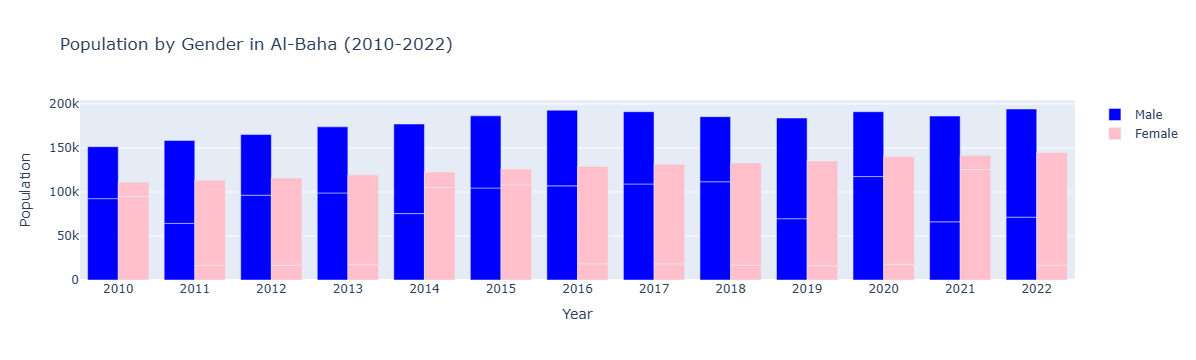

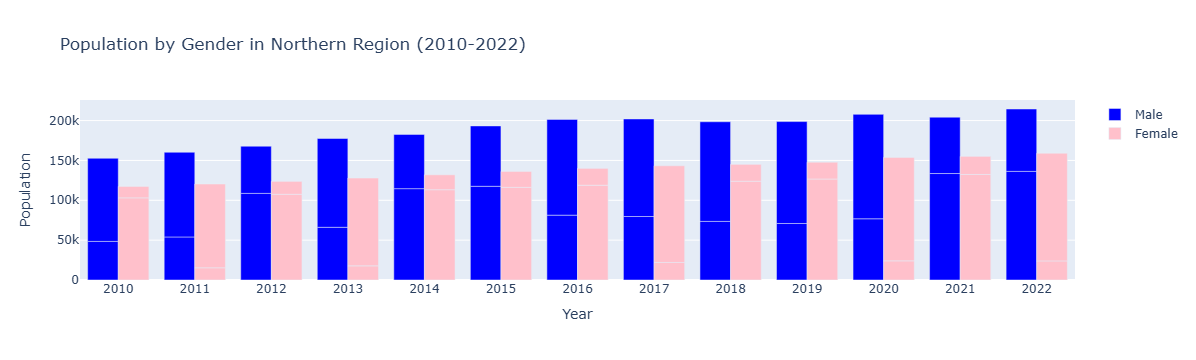

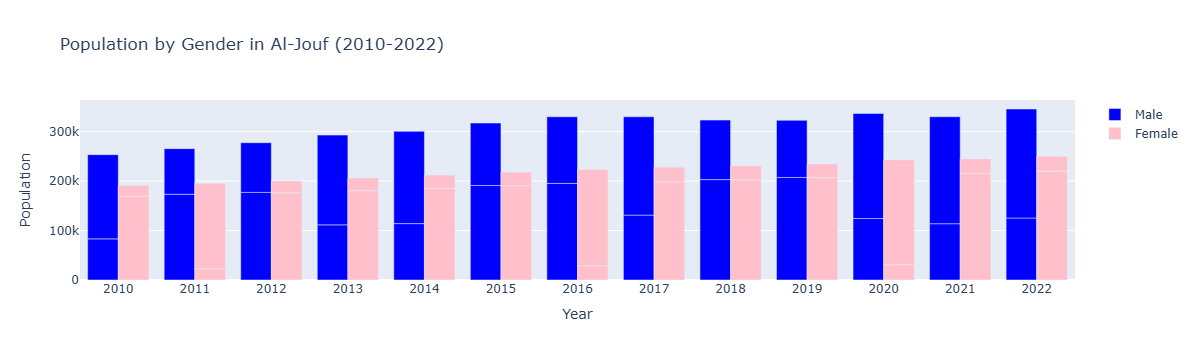

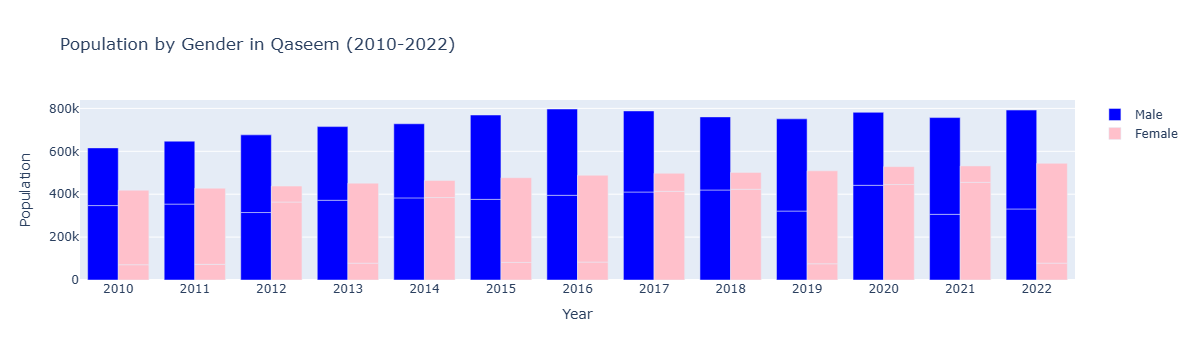

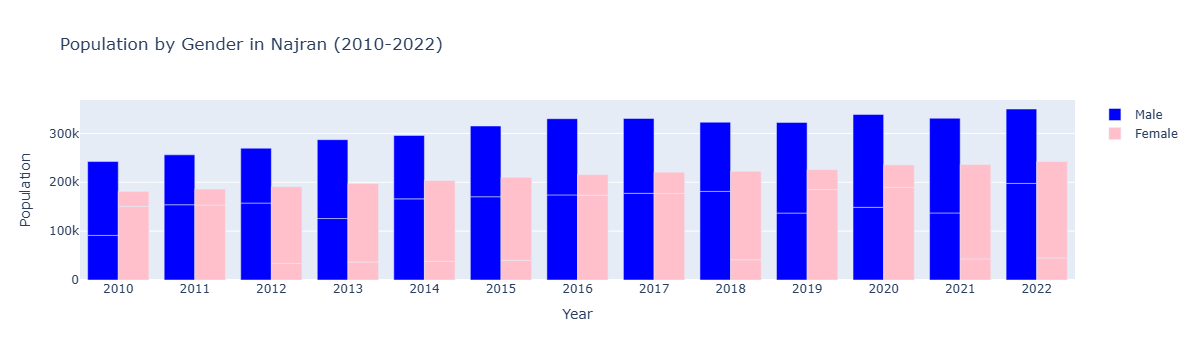

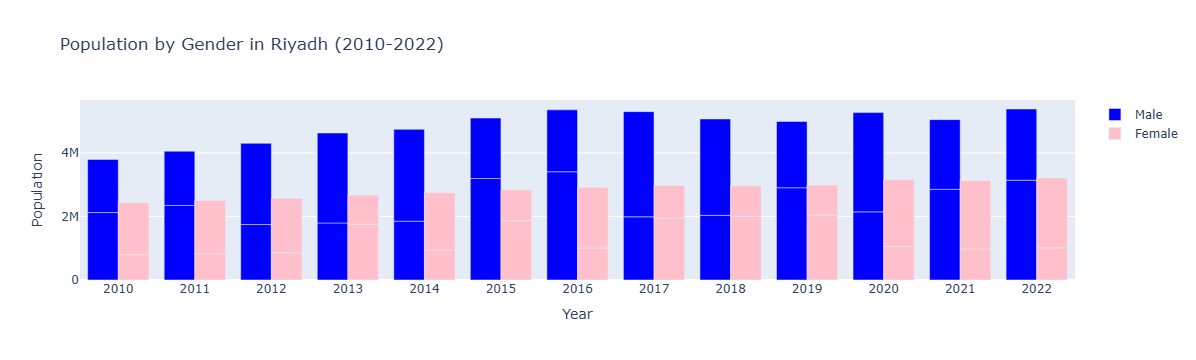

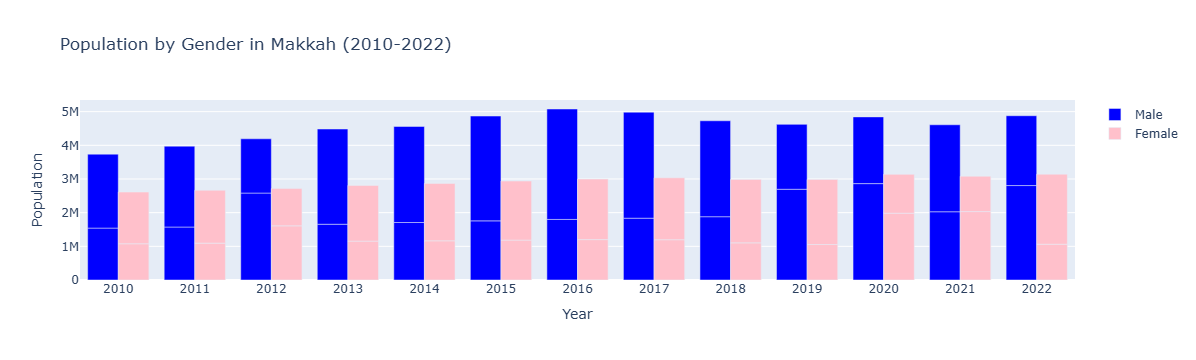

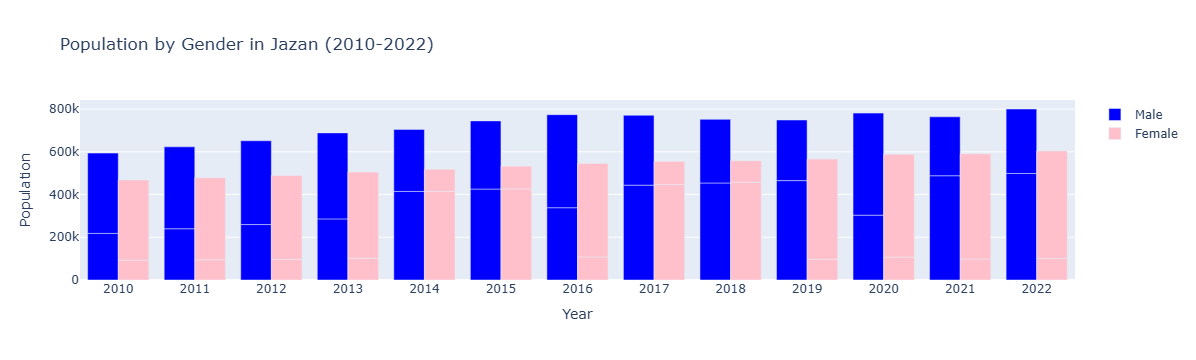

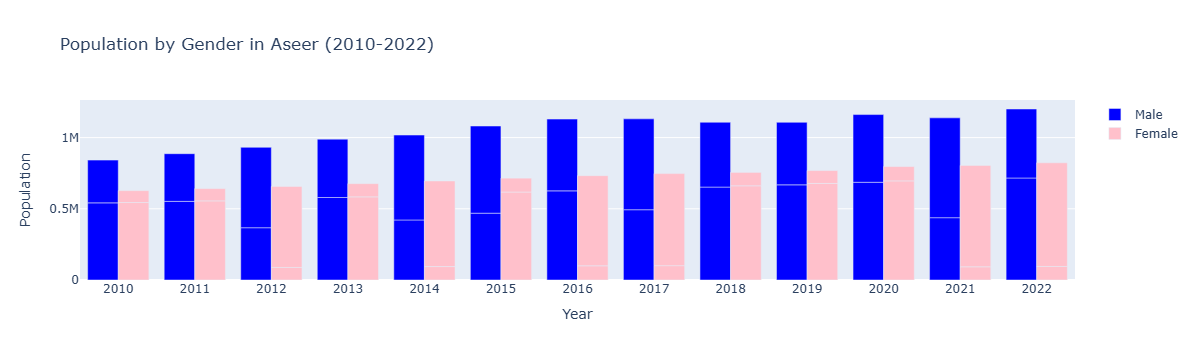

In [111]:
def visualize_population_by_gender(df):
    unique_regions = df['Region'].unique()

    for region in unique_regions:
        region_data = df[df['Region'] == region]
                #Sort the years from low to high for a better view
        region_data = region_data.sort_values(by='Year')

        
        male_data = region_data[region_data['Gender'] == 'Male']
        female_data = region_data[region_data['Gender'] == 'Female']

        
        fig = go.Figure()

        # Male bar
        fig.add_trace(go.Bar(
            x=male_data['Year'],
            y=male_data['Population estimates'],
            name='Male',
            marker_color='blue'
               ))

        # Female bar
        fig.add_trace(go.Bar(
            x=female_data['Year'],
            y=female_data['Population estimates'],
            name='Female',
            marker_color='pink'
        ))

        
        fig.update_layout(
            title=f"Population by Gender in {region} (2010-2022)",
            xaxis_title="Year",
            yaxis_title="Population",
            barmode='group'
        )

        
        fig.show()


visualize_population_by_gender(df)

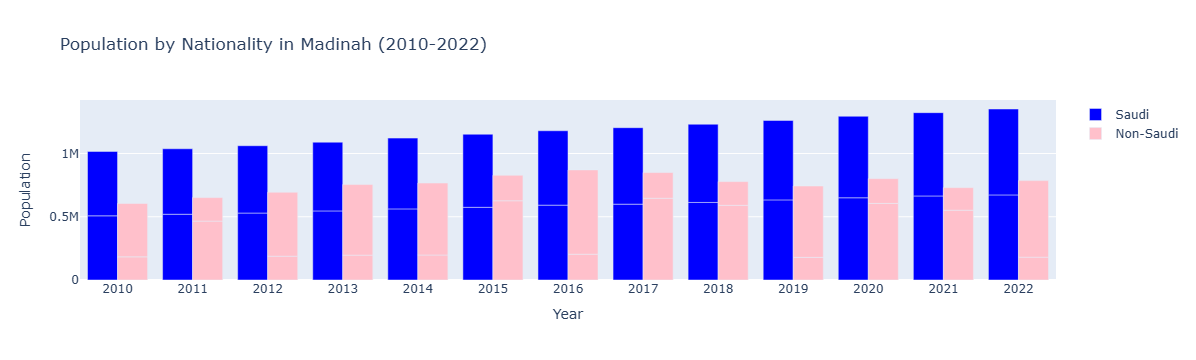

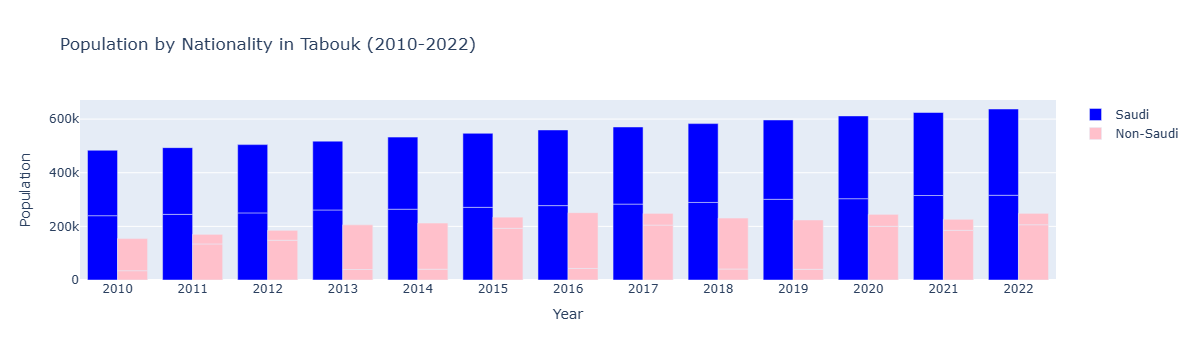

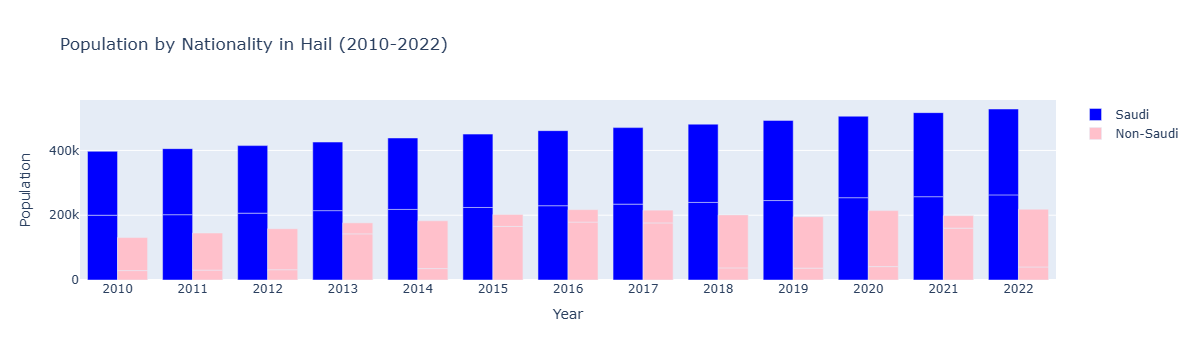

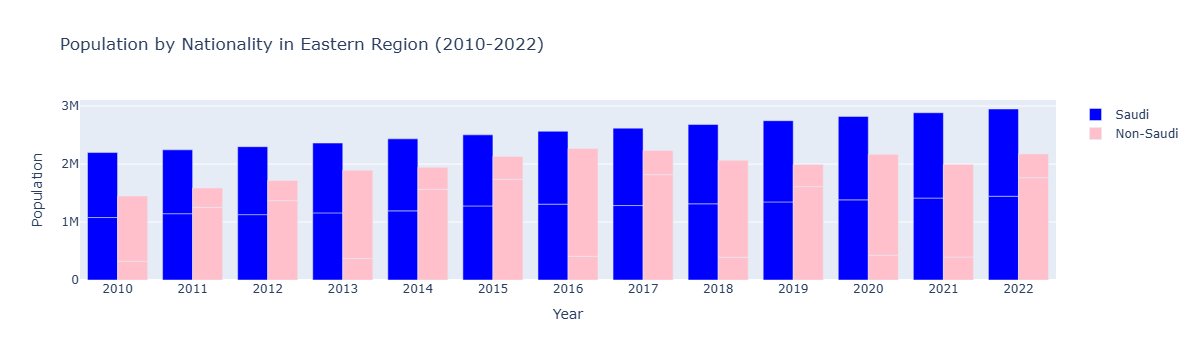

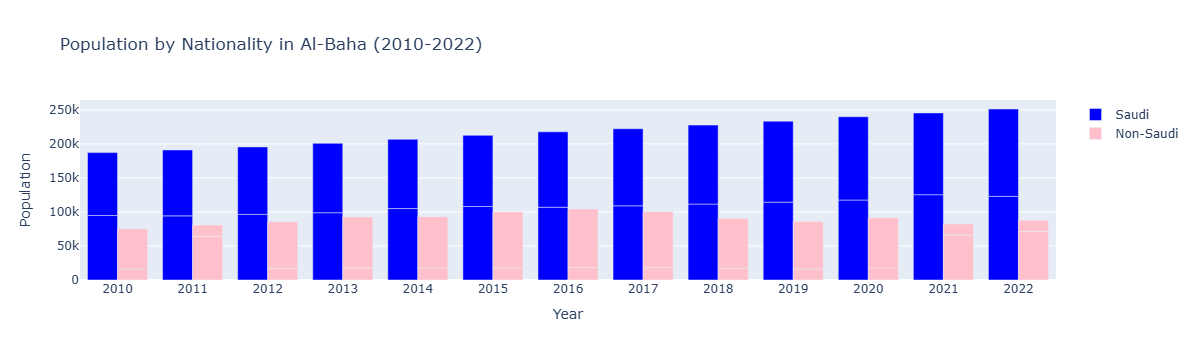

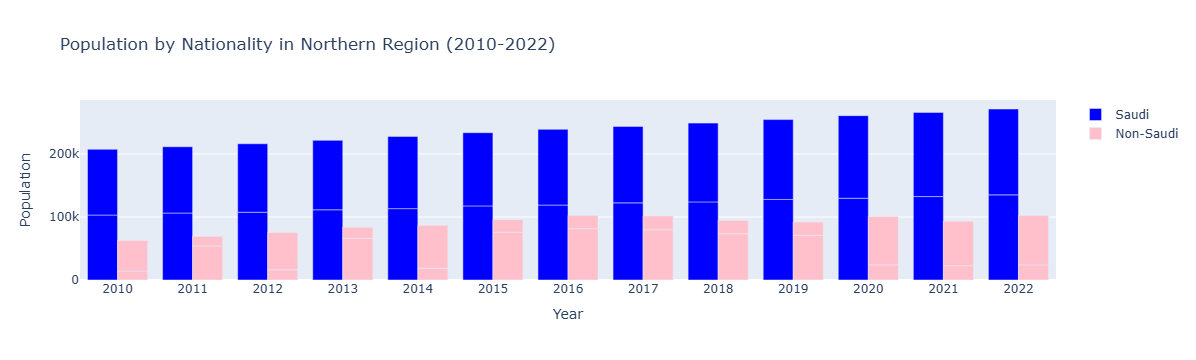

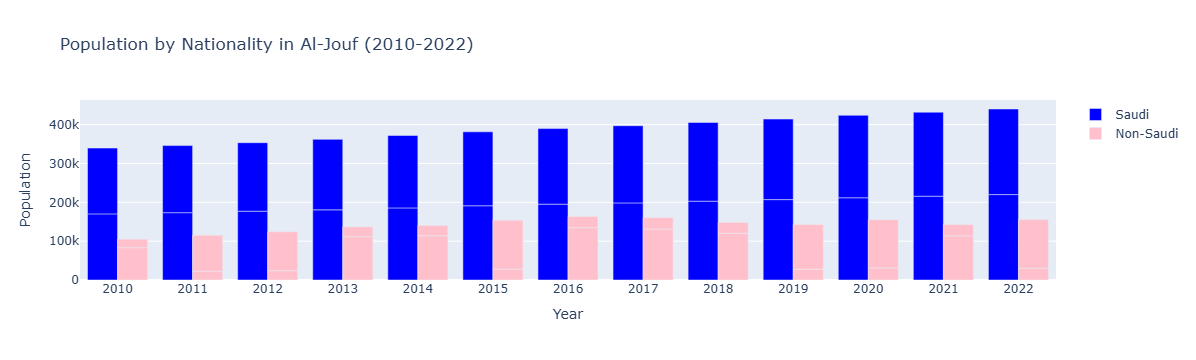

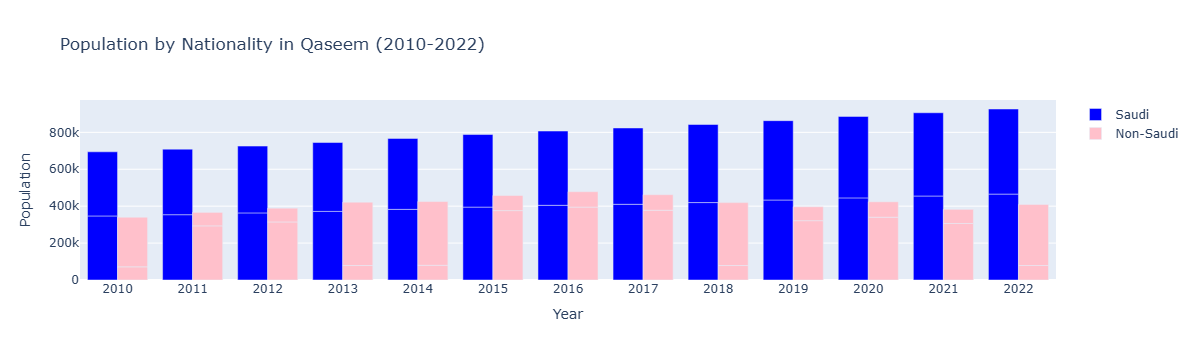

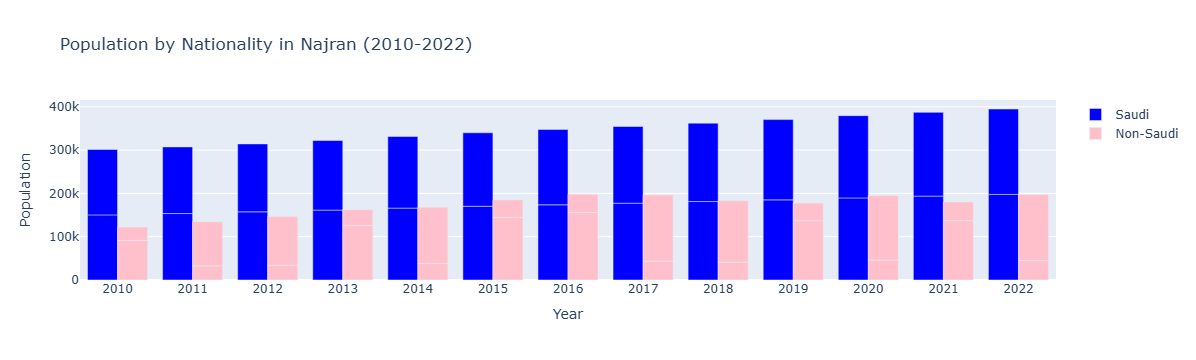

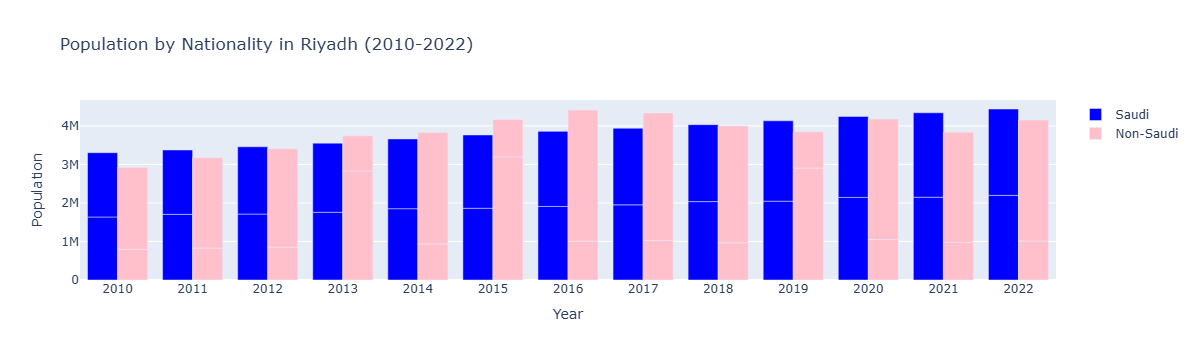

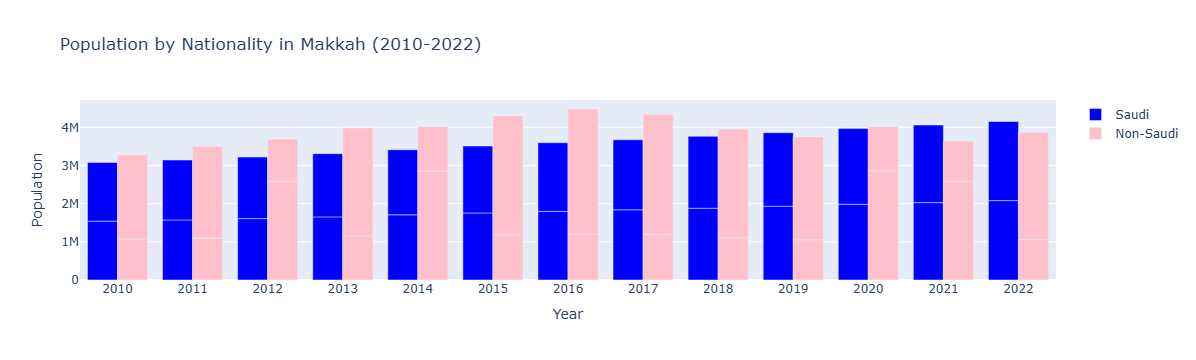

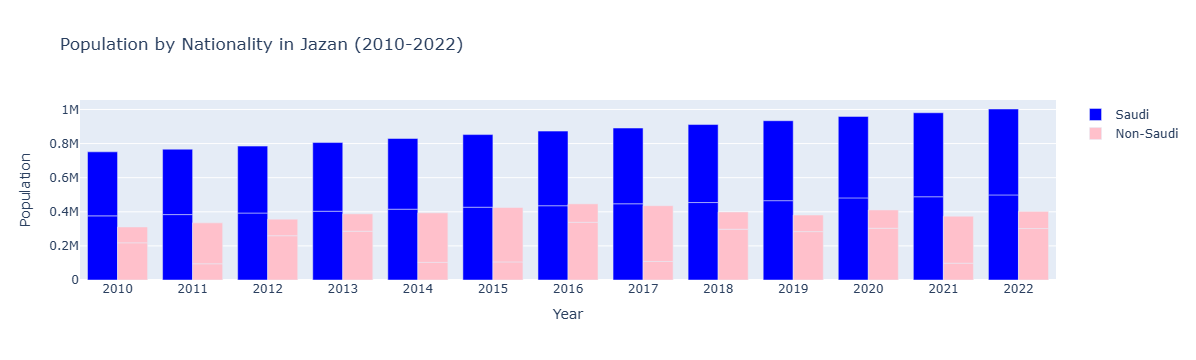

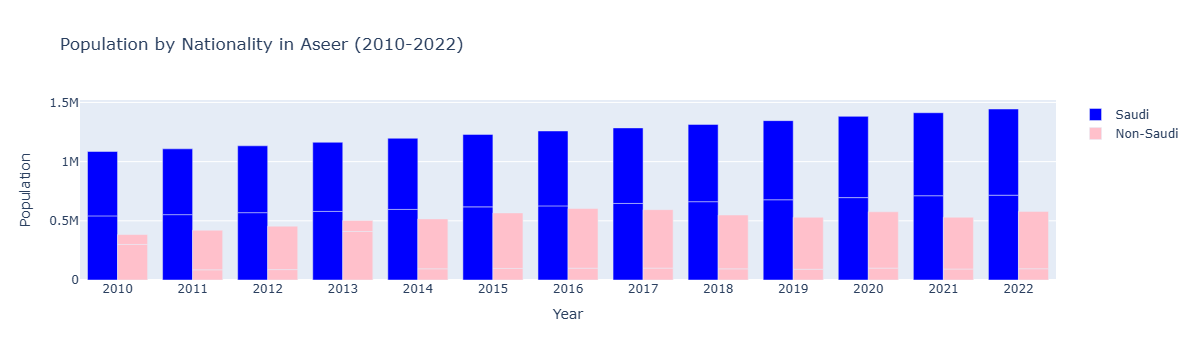

In [114]:
def visualize_population_by_nationality(df):
    unique_regions = df['Region'].unique()

    for region in unique_regions:
        region_data = df[df['Region'] == region]
                #Sort the years from low to high for a better view
        region_data = region_data.sort_values(by='Year')

        
        Saudi_data = region_data[region_data['Nationality'] == 'Saudi']
        Non_Saudi_data = region_data[region_data['Nationality'] == 'Non-Saudi']
         
        fig = go.Figure()

        # Male bar
        fig.add_trace(go.Bar(
            x=Saudi_data['Year'],
            y=Saudi_data['Population estimates'],
            name='Saudi',
            marker_color='blue'
               ))

        # Female bar
        fig.add_trace(go.Bar(
            x=Non_Saudi_data['Year'],
            y=Non_Saudi_data['Population estimates'],
            name='Non-Saudi',
            marker_color='pink'
        ))

        
        fig.update_layout(
            title=f"Population by Nationality in {region} (2010-2022)",
            xaxis_title="Year",
            yaxis_title="Population",
            barmode='group'
        )

        
        fig.show()


visualize_population_by_nationality(df)

       

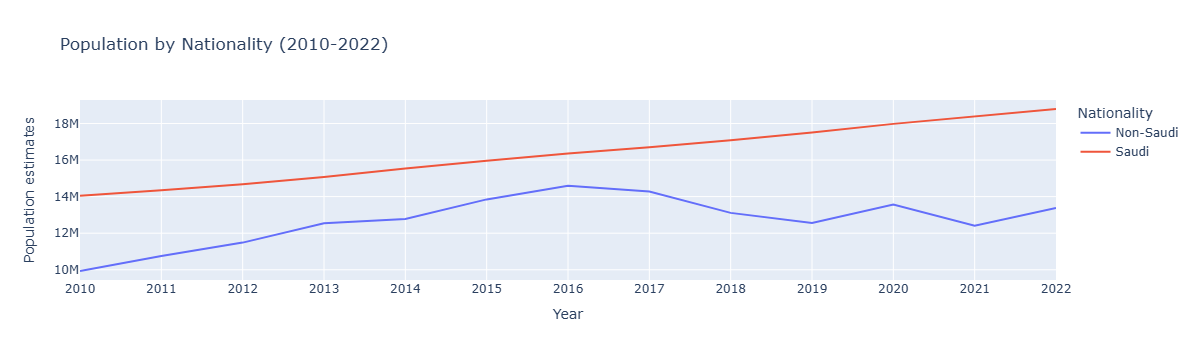

In [70]:
nationality_data = df.groupby(['Year', 'Nationality'])['Population estimates'].sum().reset_index()
px.line(nationality_data, x='Year', y='Population estimates', color='Nationality', title='Population by Nationality (2010-2022)')

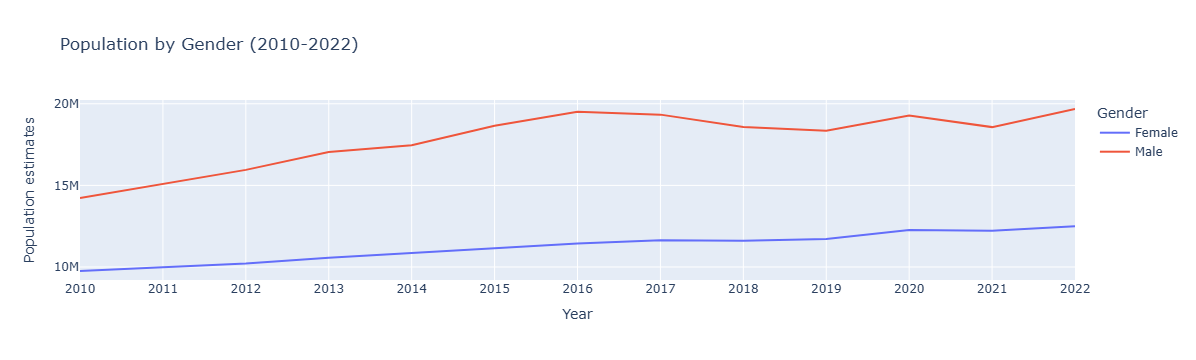

In [71]:
gender_data = df.groupby(['Year', 'Gender'])['Population estimates'].sum().reset_index()
px.line(gender_data, x='Year', y='Population estimates', color='Gender', title='Population by Gender (2010-2022)')

In [118]:


sa_population = df[df['Region'] == region]
population_by_year = sa_population.groupby('Year')['Population estimates'].sum().reset_index()
population_by_year['Population Growth'] = population_by_year['Population estimates'].diff()
plt.figure(figsize=(10, 6))
plt.plot(population_by_year['Year'], population_by_year['Population estimates'], marker='o', linestyle='-')
plt.title('Population Growth in Saudi Arabia (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.show()

NameError: name 'region' is not defined